# N-gram language modeling
Let's train an n-gram language model.

Learning objectives for this notebook:
* Train n-gram language models with smoothing to handle unseen n-grams
* Compare generated text from n-gram language models trained on different sources

In [ ]:
import nltk
import sklearn

## Load news text from Reuters
Reuters from the '90s. Old news.

In [ ]:
# Only need to run this once on your CRCD account
import nltk
nltk.download('reuters')

In [ ]:
import nltk
from nltk.corpus import reuters

In [ ]:
sents = reuters.sents() # Load all sentences in the corpus and lowercase
sents

# Preprocess the text into ngrams

In [ ]:
# Lowercase the data
sents = [[word.lower() for word in doc] for doc in sents]
sents[0][:10]

In [ ]:
# Randomly split into training and test
from sklearn.model_selection import train_test_split

random_seed =  # FILL IN an integer
train, test = train_test_split(sents, test_size=0.1, random_state=random_seed)
print(len(train))
print(len(test))

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline

n = 2 # what order of ngram
processed_train, vocab = padded_everygram_pipeline(n, train) 
# unfortunately can't inspect this as its a generator that's evaluated ("filled in") lazily

# Train an n-gram language model with Lidstone smoothing
To handle `<UNK>` (unseen) words, we will add a small pseudocount of 0.001, which is called "Lidstone" smoothing as the pseudocount $\gamma$ is $0 < \gamma < 1$. At $\gamma = 1$, this is the same as Laplace smoothing.

In [ ]:
from nltk.lm import Lidstone

# Initiate and fit an ngram language model
lm = Lidstone(gamma=0.001, order=n)
lm.fit(processed_train, vocab)

In [ ]:
# FILL IN a random word to check its counts
example_word = ''
lm.counts[example_word]

In [ ]:
# FILL IN an example bigram
bigram_first_word = ''
bigram_second_word = ''

lm.counts[[bigram_first_word]][bigram_second_word]

In [ ]:
# Check out the calculated probabilities for unigrams and bigrams ("scores")
# These are the weights/parameters of the model, estimated from data

print(lm.score(example_word))
print(lm.score(bigram_second_word, [bigram_first_word]))

In [ ]:
# Check out the log probabilities, which are used in practice. Why are they always negative?

lm.logscore(example_word)

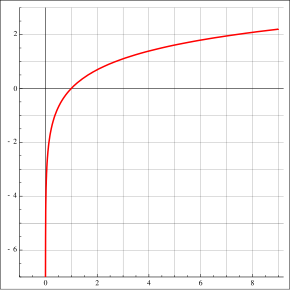  
A reminder of the natural log function

In [ ]:
# Test how it handles unseen words
weird_word = '' # FILL IN a rare word that likely does not occur in '90s news
print(lm.vocab.lookup(weird_word)) # How is it treating that word?
print(lm.score(weird_word)) # What probability is it giving that word in the model?

# Evaluate perplexity on the test set

In [ ]:
# Get test set into the same input format as the training set

processed_test_generator, vocab = padded_everygram_pipeline(n, test) 
processed_test = [list(el) for el in list(processed_test_generator)]
len(processed_test)

In [ ]:
lm.perplexity(processed_test)

# Sample (generate) from this trained language model

In [ ]:
# Run this cell as many times as you like to take new samples (generate new phrases)
# Record or copy the cell if there are any good ones you want to save and report back to the clas

num_tokens = # FILL IN with how many tokens you want to generate
prompt = [] # FILL IN with a list of tokens as a prompt (prior context). Or pass an empty list to just start generating
generated_toks = lm.generate(num_words=num_tokens, text_seed=prompt)
' '.join(prompt + generated_toks)

# Train an n-gram language model from a different data source
Alright, let's train an n-gram language model from different data sources. You can choose from the following options, or try loading some other text data if you want!
* Airbnb descriptions
* Shakespeare plays

Whichever you choose, you can skip to the corresponding part of the notebook.

## Airbnb descriptions

In [ ]:
# Load data
import pandas as pd

airbnb_filepath = '' # FILL IN the filepath to the CSV file with the Airbnb listings you should have somewhere still from session 2
# If you don't have any Airbnb data, open and run session2_preprocessing.ipynb for instructions
listings = pd.read_csv(airbnb_filepath) # reads CSV file into a pandas dataframe
len(listings)

In [ ]:
# Preprocess description column
from nltk import word_tokenize
from tqdm.auto import tqdm # for progress bar
tqdm.pandas()

def preprocess_airbnb(text):
    stray_html = '<br />'
    processed = text.replace(stray_html, ' ').lower()
    return word_tokenize(processed)

processed_airbnb = listings.description.dropna().progress_map(preprocess_airbnb).tolist()
processed_airbnb[0][:10]

In [ ]:
# Prepare input for NLTK
from nltk.lm.preprocessing import padded_everygram_pipeline

n =  # FILL IN what order of ngram
listings_input, vocab = padded_everygram_pipeline(n, processed_airbnb) 

In [ ]:
# Train n-gram language model
from nltk.lm import Lidstone

# Initiate and fit an ngram language model
lm = Lidstone(gamma=0.001, order=n) # You can also play around with change the gamma value
lm.fit(listings_input, vocab)

In [ ]:
# Run this cell as many times as you like to take new samples (generate new phrases)
# Record or copy the cell if there are any good ones you want to save and report back to the clas

num_tokens =  # FILL IN with how many tokens you want to generate
prompt = [] # FILL IN with a list of tokens as a prompt (prior context). Or pass an empty list to just start generating
generated_toks = lm.generate(num_words=num_tokens, text_seed=prompt)
' '.join(prompt + generated_toks)

## Shakespeare plays

In [ ]:
# Load Shakespeare plays

shakespeare = pd.read_csv('data/shakespeare_plays.csv', delimiter=';', header=None, names=['line_id', 'play', 'something', 'something_else', 'character', 'text'])
shakespeare.info()
shakespeare.head()

In [ ]:
# Preprocess Shakespeare play lines
from nltk import word_tokenize
from tqdm.auto import tqdm # for progress bar
tqdm.pandas()

def preprocess_shakespeare(text):
    processed = text.lower()
    return word_tokenize(processed)

processed = shakespeare.text.dropna().progress_map(preprocess_shakespeare).tolist()

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline

n =  # FILL IN what order of ngram
shakespeare_input, vocab = padded_everygram_pipeline(n, processed) 

In [ ]:
from nltk.lm import Lidstone

# Initiate and fit an ngram language model
lm = Lidstone(gamma=0.001, order=n)
lm.fit(shakespeare_input, vocab)

In [ ]:
# Run this cell as many times as you like to take new samples (generate new phrases)
# Record or copy the cell if there are any good ones you want to save and report back to the clas

num_tokens = # FILL IN with how many tokens you want to generate
prompt =  # FILL IN with a list of tokens as a prompt (prior context). Or pass an empty list to just start generating
generated_toks = lm.generate(num_words=num_tokens, text_seed=prompt)
' '.join(prompt + generated_toks)